# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [2]:
%load_ext bigquery_magics


In [173]:
%%bigquery
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 

Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,12,6,49.500000,4,47.500000,4,983.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,36010,99999,1929,10,7,53.200001,4,49.099998,4,1002.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,38940,99999,1929,10,14,53.000000,4,50.700001,4,1030.699951,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,33790,99999,1929,10,18,46.799999,4,41.500000,4,1009.200012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
4,30750,99999,1929,11,24,46.700001,4,43.200001,4,989.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,30050,99999,1929,12,1,45.700001,4,42.799999,4,991.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,38940,99999,1929,11,29,54.200001,4,51.799999,4,1001.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,33790,99999,1929,10,3,52.500000,4,39.299999,4,998.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,33110,99999,1929,10,28,52.200001,4,47.299999,4,1003.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,32620,99999,1929,11,3,44.599998,5,40.599998,4,1021.200012,...,NaN,<NA>,0.01,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [174]:
%%bigquery df

SELECT date(year, month, day) as date, *
FROM `bigquery-public-data.samples.gsod`
WHERE 
year BETWEEN 2000 AND 2005 AND 
station_number BETWEEN 725300 AND 726300
ORDER by station_number, date


Query is running:   0%|          |

Downloading:   0%|          |

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

Start by checking which year received the most snowfall in our data. 

In [175]:
%%bigquery

SELECT
year, SUM(snow_depth) as total_snow
FROM `bigquery-public-data.samples.gsod`
WHERE
year BETWEEN 2000 AND 2005
AND station_number BETWEEN 725300 AND 726300
GROUP BY year
ORDER BY total_snow DESC


Query is running:   0%|          |

Downloading:   0%|          |

,year,total_snow
0,2001,13089.700075
1,2000,12085.800062
2,2005,11799.300037
3,2002,10150.700011
4,2004,9296.300027
5,2003,6766.100036


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

In [176]:
%%bigquery

WITH snow_inc AS(
SELECT date(year, month, day) as date, station_number, IFNULL(snow_depth, 0) AS snow_depth, 
IFNULL(snow_depth, 0) - LAG (IFNULL(snow_depth, 0), 1, 0)
OVER (PARTITION BY station_number ORDER BY year,month,day) AS snow_depth_change  
FROM `bigquery-public-data.samples.gsod`
WHERE
year BETWEEN 2000 AND 2005
AND station_number BETWEEN 725300 AND 726300
)

SELECT
date, station_number, snow_depth
FROM snow_inc
ORDER BY snow_depth DESC
LIMIT 1



Query is running:   0%|          |

Downloading:   0%|          |

,date,station_number,snow_depth
0,2004-01-20,725780,90.900002


Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

# Data Cleaning
Thought process documentation:
KEEP:   
Date  
Mean Temperature  
Mean Sea level, not sure so keep, some missing vals, extrapolite maybe?  
Mean Station Pressure, not sure so keep but does it have enough information?  
Mean Visibility, no sure so keep?  
Mean Wind speed  
Max sustained wind speed  
Max gust wind speed  
Max Temperature  
Min Temperature, but enough values?  
Total precipation could be important  
Fog, Rain, Hail, Thunder, Tornado  

  
DROP:  
Does WBAN include geospatial information? Doesnt include any direct geospatial information, might be redundant thus DROP  
Year month day are saved as date, can be dropped, keep date  
Everything with samples seems irrelevant  
Whats min/max Temperature explicit?  
Snow Depth, Data leakage  


In [7]:
print(df.columns.tolist())

['date', 'station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp', 'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples', 'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples', 'mean_station_pressure', 'num_mean_station_pressure_samples', 'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed', 'num_mean_wind_speed_samples', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit', 'min_temperature', 'min_temperature_explicit', 'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']


## NEXT STEP:
Check for missing values.

In [178]:
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0] 
    missing = missing.sort_values(ascending=False)
    return missing
    
missing_summary = check_missing_values(df)
print(missing_summary)

min_temperature                       447037
min_temperature_explicit              447037
snow_depth                            437159
mean_station_pressure                 433555
num_mean_station_pressure_samples     433555
max_gust_wind_speed                   183636
mean_sealevel_pressure                174206
num_mean_sealevel_pressure_samples    174206
total_precipitation                    20608
mean_visibility                        10592
num_mean_visibility_samples            10592
max_sustained_wind_speed                1779
mean_dew_point                          1370
num_mean_dew_point_samples              1370
mean_wind_speed                          885
num_mean_wind_speed_samples              885
max_temperature_explicit                 157
max_temperature                          157
dtype: int64


In this case, drawing the line between mean_sealevel and total precipitation is reasonable. We have total of 447037 rows, 20000 missing values are around 4.6%. Therefore we will drop folliwing columns: 

DROP:

Due to missing vals:

min_temperature                       
min_temperature_explicit              
snow_depth                            
mean_station_pressure                 
num_mean_station_pressure_samples     
max_gust_wind_speed                   
mean_sealevel_pressure                
num_mean_sealevel_pressure_samples 

Due to irrelevancy:

wban_number
year,
month,
day,
num_mean_temp_samples,
num_mean_dew_point_samples,
num_mean_visibility_samples,
num_mean_wind_speed_samples,
max_temperature_explicit,


In [179]:
df = df.drop(columns=[
    "min_temperature",
    "min_temperature_explicit",
    "snow_depth",
    "mean_station_pressure",
    "num_mean_station_pressure_samples",
    "max_gust_wind_speed",
    "mean_sealevel_pressure",
    "num_mean_sealevel_pressure_samples",
    "wban_number",
    "num_mean_temp_samples",
    "num_mean_dew_point_samples",
    "num_mean_visibility_samples",
    "num_mean_wind_speed_samples",
    "max_temperature_explicit"
])

In [180]:
missing_summary = check_missing_values(df)
print(missing_summary)

total_precipitation         20608
mean_visibility             10592
max_sustained_wind_speed     1779
mean_dew_point               1370
mean_wind_speed               885
max_temperature               157
dtype: int64


How to fill missing vals?
Most vals for total precipitation are 0.0 therefore set to 0.0.
For all other vals, interpolite from the day before and after, if its a different station take value from the nearest day.

In [182]:
df["total_precipitation"] = df["total_precipitation"].fillna(0.0)

columns_to_interpolate = [
    "mean_visibility",
    "max_sustained_wind_speed",
    "mean_dew_point",
    "mean_wind_speed",
    "max_temperature"
]

for col in columns_to_interpolate:
    df[col] = (
        df.groupby("station_number")[col]
          .apply(lambda group: group.interpolate(method="linear", limit_direction="both"))
          .reset_index(drop=True)
    )


In [183]:
print(df[columns_to_interpolate].isna().sum())

mean_visibility             8541
max_sustained_wind_speed       0
mean_dew_point                 0
mean_wind_speed                0
max_temperature                0
dtype: int64


In [184]:
stations_all_missing = df.groupby("station_number")["mean_visibility"].apply(lambda x: x.isna().all())
print(stations_all_missing[stations_all_missing])

station_number
725386    True
725387    True
725643    True
725644    True
725646    True
725647    True
725648    True
725649    True
725784    True
725824    True
726190    True
726300    True
Name: mean_visibility, dtype: bool


The stations above have no information at all regarding mean_visibility, therefore drop these entire stations. 

In [185]:
stations_to_drop = [
    725386, 725387, 725643, 725644, 725646, 725647,
    725648, 725649, 725784, 725824, 726190, 726300
]

df = df[~df["station_number"].isin(stations_to_drop)].reset_index(drop=True)

Checking whether fog, rain, hail, thunder, tornado cause data leakage. Code below shows that it does hence leave them out of dataset

In [186]:
df[["snow", "fog", "rain", "hail", "thunder", "tornado"]].corr()

,snow,fog,rain,hail,thunder,tornado
snow,1.0,1.0,1.0,1.0,1.0,1.0
fog,1.0,1.0,1.0,1.0,1.0,1.0
rain,1.0,1.0,1.0,1.0,1.0,1.0
hail,1.0,1.0,1.0,1.0,1.0,1.0
thunder,1.0,1.0,1.0,1.0,1.0,1.0
tornado,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
event_cols = ["fog", "rain", "hail", "thunder", "tornado"]

df = df.drop(columns=event_cols)

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [195]:
import datetime as dt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

df_copy = df.copy()
df_copy["date"] = pd.to_datetime(df_copy["date"])

df_copy["snow"] = df_copy["snow"].astype(int)

df_copy["snow_prev"] = df_copy.groupby("station_number")["snow"].shift(1)
df_copy["temp_prev"] = df_copy.groupby("station_number")["mean_temp"].shift(1)

df_copy["snow_prev"] = df_copy["snow_prev"].fillna(0)
df_copy["temp_prev"] = df_copy["temp_prev"].fillna(df_copy["mean_temp"])


test_date = str(dt.datetime.today() - dt.timedelta(days=20*365)).split(' ')[0]

test_df = df_copy[df_copy["date"] == test_date].copy()
train_eval_df = df_copy[df_copy["date"] < test_date].copy()

train_df, eval_df = train_test_split(
    train_eval_df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

target = "snow"
feature_cols = [col for col in train_df.columns if col not in ["snow","date","station_number","year","month","day"]]

X_train = train_df[feature_cols]
y_train = train_df[target]
X_eval = eval_df[feature_cols]
y_eval = eval_df[target]
X_test = test_df[feature_cols]
y_test = test_df[target]

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [ ]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\nMetrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    

## Random Forest Model
RFC known to be a good model for stock prediction, this is kind of a similiar use case. Before starting, some feature engineering will be done. To support a bit of temporal knowledge, adding these two columns might enhance performance:
1. Lag for snow: See whether it snowed the day before
2. Calculate the mean temperature difference. A drop in temperature could indicate a higher chance for snow.  

In [198]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = "balanced")
rf.fit(X_train, y_train)

y_eval_pred = rf.predict(X_eval)
y_test_pred = rf.predict(X_test)
print_metrics(y_eval, y_eval_pred, "Eval Set")
print_metrics(y_test, y_test_pred, "Test Set")


Metrics for Eval Set:
Accuracy: 0.9104378818737271
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     67676
           1       0.76      0.51      0.61     10884

    accuracy                           0.91     78560
   macro avg       0.85      0.74      0.78     78560
weighted avg       0.90      0.91      0.90     78560


Metrics for Test Set:
Accuracy: 0.8522167487684729
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.62      0.53      0.57        38

    accuracy                           0.85       203
   macro avg       0.76      0.73      0.74       203
weighted avg       0.84      0.85      0.85       203



Good Test Accuracy, very bad recall, ideally it is better to predict snow and it won't snow rather than vice versa. Try Resampling with Smote

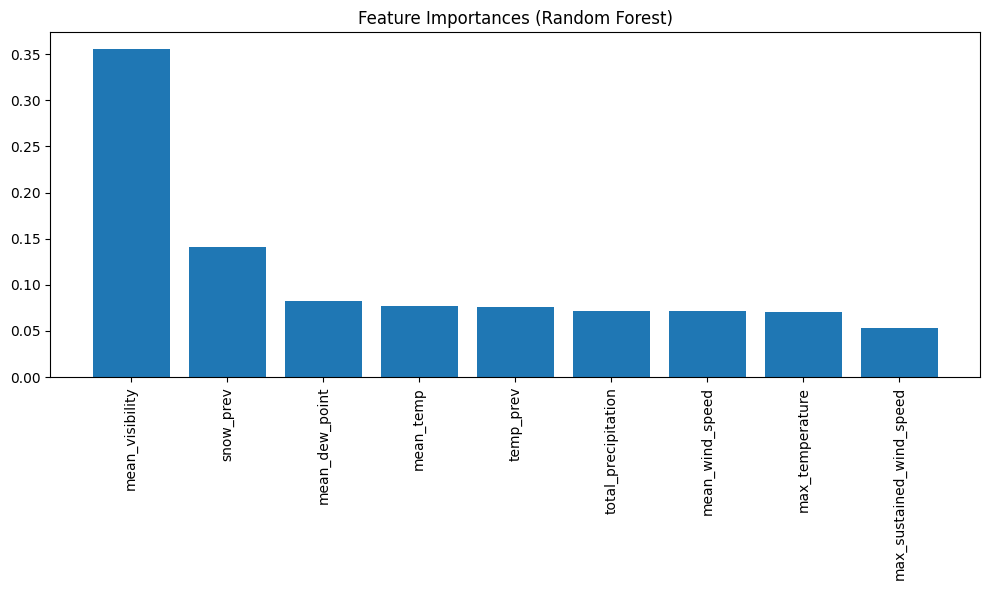

In [199]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(feature_cols)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Mean_visibility was indeed an important feature, it was the correct choice to drop the rows instead of the column.

In [200]:
from imblearn.over_sampling import SMOTE

X_train = X_train.astype(float)
y_train = y_train.astype(int)

smote = SMOTE(random_state=42)
y_train = y_train.astype(int)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_eval_pred = rf_smote.predict(X_eval)
y_test_pred = rf_smote.predict(X_test)
print_metrics(y_eval, y_eval_pred, "Eval Set")
print_metrics(y_test, y_test_pred, "Test Set")


Metrics for Eval Set:
Accuracy: 0.904887983706721
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     67676
           1       0.67      0.63      0.65     10884

    accuracy                           0.90     78560
   macro avg       0.80      0.79      0.80     78560
weighted avg       0.90      0.90      0.90     78560


Metrics for Test Set:
Accuracy: 0.8522167487684729
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       165
           1       0.60      0.63      0.62        38

    accuracy                           0.85       203
   macro avg       0.76      0.77      0.76       203
weighted avg       0.86      0.85      0.85       203



Better Recall but worse Precision. After a bit of research XGBoost seems to be popular and a good model.

# XGBoost Model

In [201]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

#fix imbalance
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  
    n_estimators=100,            
    max_depth=3,                
    learning_rate=0.1,          
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight = scale_pos_weight,
)

xgb_model.fit(
    X_train, 
    y_train,
    eval_set=[(X_eval, y_eval)], 
    verbose=True
)

y_pred_train = xgb_model.predict(X_train)
y_pred_eval = xgb_model.predict(X_eval)
y_pred_test = xgb_model.predict(X_test)

print_metrics(y_train, y_pred_train, "Training")
print_metrics(y_eval, y_pred_eval, "Validation")
print_metrics(y_test, y_pred_test, "Test")

print("\nFeature Importances:")
importance = xgb_model.feature_importances_
for i, (feature, imp) in enumerate(zip(feature_cols, importance)):
    print(f"{i+1}. {feature}: {imp:.4f}")

[0]	validation_0-logloss:0.64719
[1]	validation_0-logloss:0.60985
[2]	validation_0-logloss:0.57908
[3]	validation_0-logloss:0.55306
[4]	validation_0-logloss:0.53090
[5]	validation_0-logloss:0.51236
[6]	validation_0-logloss:0.49628
[7]	validation_0-logloss:0.48273
[8]	validation_0-logloss:0.47075
[9]	validation_0-logloss:0.46027
[10]	validation_0-logloss:0.45124
[11]	validation_0-logloss:0.44335
[12]	validation_0-logloss:0.43635
[13]	validation_0-logloss:0.43034
[14]	validation_0-logloss:0.42528
[15]	validation_0-logloss:0.42056
[16]	validation_0-logloss:0.41651
[17]	validation_0-logloss:0.41307
[18]	validation_0-logloss:0.40993
[19]	validation_0-logloss:0.40720
[20]	validation_0-logloss:0.40486
[21]	validation_0-logloss:0.40263
[22]	validation_0-logloss:0.40061
[23]	validation_0-logloss:0.39885
[24]	validation_0-logloss:0.39724
[25]	validation_0-logloss:0.39572
[26]	validation_0-logloss:0.39453
[27]	validation_0-logloss:0.39342
[28]	validation_0-logloss:0.39228
[29]	validation_0-loglos

# LSTM Model

Due to the time constraint I stopped here. Some thoughts about the LSTM approach: If snow patterns depend on long historical trends, LSTMs can capture these dependencies better than XGBoost. With the current design, the XGBoost already captures a tiny temporal dependency by cosnidering snow lag which is shown to be an important feature. Both the Random Forest and XGBoost are quite lightweight which is a huge advantage compared to LSTM. The LSTM will likely be the better option in terms of accuracy but will require frequent retraining as the weather is dynamic. Its a trade off between simplicity and speed versus complexity and modeling power.